<a href="https://colab.research.google.com/github/Seyoung-Jung/Tobigs-HW/blob/master/week4/Ensemble/HW_week4_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

## EDA 및 전처리

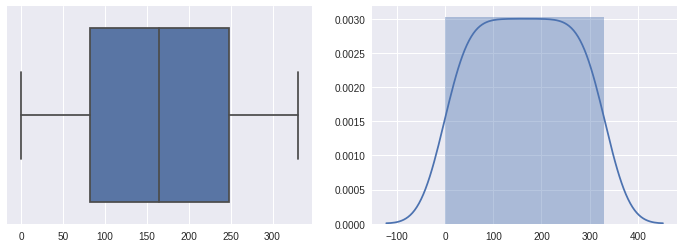

In [55]:
plt.style.use('seaborn')
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(y, ax=ax1)
sns.distplot(y,ax=ax2)

y의 분포를 살펴보니 로그변환을 해야 할 만큼 skewed 되어있진 않는 것으로 판단한다.

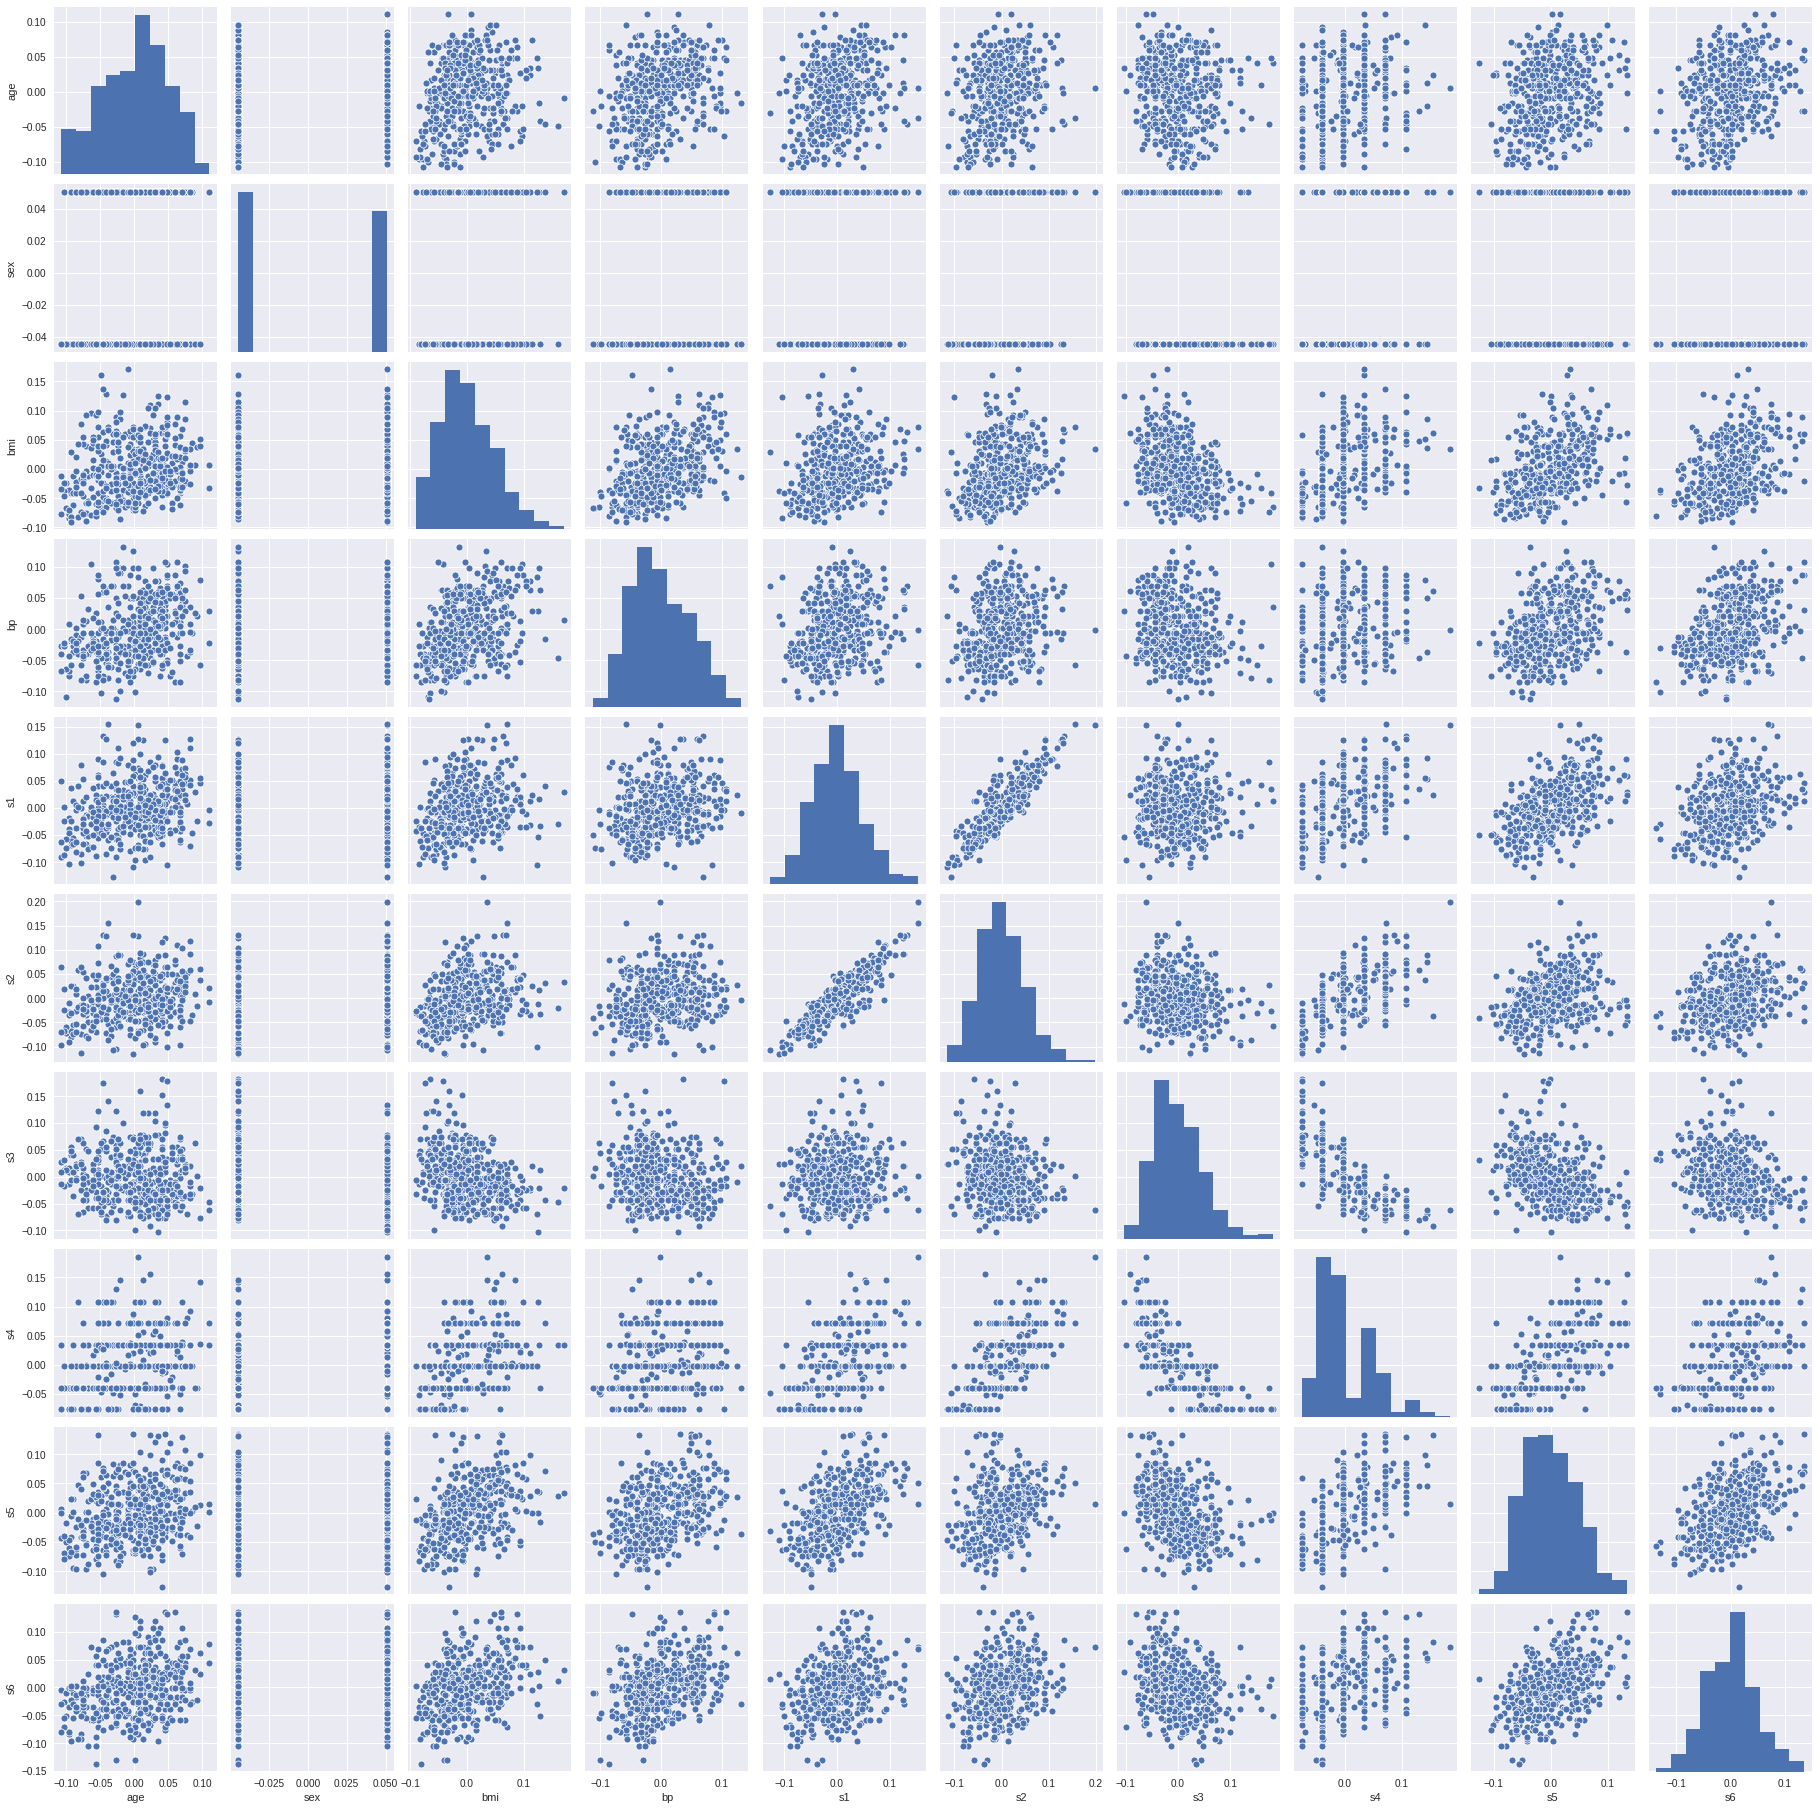

In [ ]:
sns.pairplot(X)

pairplot 결과 다중공선성이 의심되어 VIF를 통해 변수를 제거해준다.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
4,59.203786,s1
5,39.194379,s2
6,15.402352,s3
8,10.076222,s5
7,8.890986,s4
2,1.509446,bmi
9,1.484623,s6
3,1.459429,bp
1,1.278073,sex
0,1.217307,age


In [3]:
X.drop(['s1'], axis=1, inplace=True)

In [ ]:
X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

베이스로 거리 기반 모델을 사용할 것이므로 split 후 scaling을 해준다.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)
scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

##베이스 모델 튜닝

In [8]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

In [57]:
lasso = Lasso(alpha =0.05)
print('lasso', cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2').mean())

svm = SVR(kernel='rbf', C=1, gamma='scale')
print('svm', cross_val_score(svm, X_train, y_train, cv=5, scoring='r2').mean())

knn = KNeighborsRegressor(n_neighbors = 20)
print('knn', cross_val_score(knn, X_train, y_train, cv=5, scoring='r2').mean())

rf = RandomForestRegressor(n_estimators=100)
print('rf', cross_val_score(rf, X_train, y_train, cv=5, scoring='r2').mean())

xgb_ = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
print('xgb', cross_val_score(xgb_, X_train, y_train, cv=5, scoring='r2').mean())

lgb_ = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
print('lgb', cross_val_score(lgb_, X_train, y_train, cv=5, scoring='r2').mean())

lasso 0.4532536368746382
svm 0.08762622955136219
knn 0.4031341721717734
rf 0.3866032595256822
[06:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb 0.39308375009727536
lgb 0.37536333815579015


설명력이 높게 나온 lass, knn, rf를 베이스모델로, xgb를 final 모델로 채택하여  Stacking을 시행한다.

In [58]:
from sklearn.ensemble import StackingRegressor

# 파라미터 설정
estimators = [
              ('lasso',lasso),
              ('knn', knn),
              ('rf',rf)
]
              
# Stacking
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05),
    cv = 10,
    n_jobs=3,
    verbose=3
    )

# fit
reg.fit(X_train, y_train)

[06:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=10,
                  estimators=[('lasso',
                               Lasso(alpha=0.05, copy_X=True,
                                     fit_intercept=True, max_iter=1000,
                                     normalize=False, positive=False,
                                     precompute=False, random_state=None,
                                     selection='cyclic', tol=0.0001,
                                     warm_start=False)),
                              ('knn',
                               KNeighborsRegressor(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=20,
                                                   p=2, we...
                                               colsample_bynode=1,
        

In [54]:
stack_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))
print(metrics.mean_squared_error(y_test, stack_pred))

0.5547493472408238
2795.0624622983423


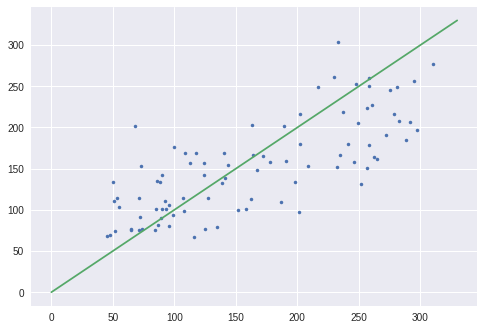

In [56]:
plt.plot(y_test, stack_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

결론적으로 그리 높은 설명력을 얻진 못했으나 모델 하나로만 예측했을 때보다는 조금 나아진 결과를 알 수 있다. 데이터 자체가 깔끔하게 예측하기 좋은 데이터는 아니었던 것 같으나 Stacking이 조금이나마 효과를 보았다고는 할 수 있을 것 같습니다. (그냥 Titanic으로 할걸..)